#[01] Greedy 그리디
* 현재 상황에서 가장 좋아 보이는 것만을 선택하는 알고리즘
* 현재의 선택이 나중에 미칠 영향에 대해서는 고려하지 않음

## (1) 거스름돈
* 500, 100, 50, 10원 동전 무한개 존재. N원 거슬러 줄 때 동전 최소 갯수. N은 항상 10의 배수임

In [ ]:
n = 1260
count = 0

# 큰 단위의 화폐부터 차례대로 확인
coin_types = [500, 100, 50, 10]

for coin in coin_types:
    count += n // coin # 해당 화폐로 거슬러 줄 수 있는 동전의 갯수 세기
    n %= coin

print(count)

# 화폐의 종료만큼 반복 수행
# 따라서 화폐 종류가 K개일 때 시간 복잡도 : O(K)
# 동전의 총 종류에만 영향을 받고, 거슬러 줘야 하는 금액 크기와는 무관함

6


## (2) 큰 수의 법칙
* 크기 N인 배열에서 주어진 수들을 M번 더하여 가장 큰 수 만들자
* 단, 배열의 특정 인덱스에 해당하는 수가 연속 K번을 초과하여 더해질 수 없다.
* 입력 조건
 - 첫째 줄에 N(2<=N<=1000), M(1<=M<=10000), K(1<=K<=10000) 자연수 공백 구분
 - 둘째 줄에 N개 자연수 주어짐. 공백 구분
 - K는 항상 M보다 작다.
* 출력 조건 : 더해진 답 출력


In [ ]:
# 입력 예시
# 5 8 3
# 2 4 5 4 6
# 출력 예시 : 46

# N, M, K 공백 구분하여 입력받기
n, m, k = map(int, input().split())
# N개의 수를 공백으로 구분하여 입력받기
data = list(map(int, input().split()))

data.sort()                   # 입력 받은 수 정렬
first = data[n-1]            # 가장 큰수
second = data[n-2]      # 두 번째로 큰 수

result = 0

while True:
    for i in range(k):        # 가장 큰 수 K번 더하기
        if m == 0:              # m이 0이라면 반복문 탈출
            break
        result += first
        m -= 1                   # 더할 때마다 1씩 빼기
    if m == 0:                  # m이 0이라면 반복문 탈출
        break
    result += second       # 두 번째로 큰 수를 한 번 더하기
    m -= 1                       # 더할 때마다 1씩 빼기

print(result)                   # 최종 답안 출력

5 8 3
2 4 5 4 6
46


In [ ]:
# 입력 예시
# 5 8 3
# 2 4 5 4 6
# 출력 예시 : 46

# N, M, K 공백 구분하여 입력받기
n, m, k = map(int, input().split())
# N개의 수를 공백으로 구분하여 입력받기
data = list(map(int, input().split()))

data.sort()
first = data[n-1]
second = data[n-2]

# 가장 큰 수가 더해지는 횟수 계산
count = int(m / (k + 1)) * k
count += m % (k + 1)

result = 0
result += (count) * first # 가장 큰 수 더하기
result += (m - count) * second # 두 번째로 큰 수 더하기

print(result) # 최종 답안 출력

5 8 3
2 4 5 4 6
46


## (3) 숫자 카드 게임
* N x M 형태 카드 놓임
* 뽑고자 하는 카드의 행 선택
* 선택된 행의 카드 중 가장 숫자 낮은 카드 뽑음
* 최종적으로 가장 높은 숫자의 카드 뽑도록 전략 세우자
* 입력 조건
 - 첫째 줄에 행 갯수 N, 열 갯수 M 주어짐
 - 둘째 줄부터 N개 줄에 걸쳐 숫자 주어짐
* 출력 조건 : 선택 카드의 숫자 출력

In [ ]:
# 입력 예시 1
# 3 3
# 3 1 2
# 4 1 4
# 2 2 2
# 출력 예시 1 : 2

# 입력 예시 2
# 2 4
# 7 3 1 8
# 3 3 3 4
# 출력 예시 2 : 3

# N, M 입력
n, m = map(int, input().split())

result = 0
# 한 줄씩 입력 받아 확인
for i in range(n):
    data = list(map(int, input().split()))
    # 현재 줄에서 '가장 작은 수' 찾기
    min_value = min(data)
    # '가장 작은 수' 중에 가장 큰 수 찾기
    result = max(result, min_value)

print(result) # 최종 답안 출력

2 4
7 3 1 8
3 3 3 4
3


In [ ]:
# N, M 입력
n, m = map(int, input().split())

result = 0
# 한 줄씩 입력 받아 확인
for i in range(n):
    data = list(map(int, input().split()))
    # 현재 줄에서 '가장 작은 수' 찾기
    min_value = 10001
    for a in data:
        min_value = min(min_value, a)
    # '가장 작은 수' 중에서 가장 큰 수 찾기
    result = max(result, min_value)

print(result)

2 4
7 3 1 8
3 3 3 4
3


## (4) 1이 될 때까지
* 어떠한 수 N이 1이 될 때까지 다음 두 과정 중 하나를 반복적으로 선택하여 수행
* 단, 두 번째 연산은 N이 K로 나누어 떨어질 때만 가능
* 1. N에서 1을 뺀다.
* 2. N을 K로 나눈다.
* N과 K가 주어질 때 N이 1이 될 때까지 1번 혹은 2번의 과정을 수행하는 최소 횟수 구하자
* 입력 조건
 - 첫째 줄에 N, K (2 <= N, K <= 100000) 주어짐
* 출력 조건 : 횟수 최솟값 출력

In [ ]:
# 입력 예시
# 25 5
# 출력 예시 : 2
n, k = map(int, input().split())
result = 0

# N이 K 이상이라면 K로 계속 나누기
while n >= k:
    # N이 K로 나누어 떨어지지 않는다면 N에서 1씩 빼기
    while n % k != 0:
        n -= 1
        result += 1
    # K로 나누기
    n //= k
    result += 1

# 마지막 남은 수에 대하여 1씩 빼기
while n > 1:
    n -= 1
    result += 1

print(result)

25 5
2


In [ ]:
n, k = map(int, input().split())
result = 0

while True:
    # (N == K로 나누어 떨어지는 수)가 될 때까지 1씩 빼기
    target = (n // k) * k
    result += (n - target)
    n = target
    # N이 K보다 작을 때 (더 이상 나눌 수 없을 때) 반복문 탈출
    if n < k:
        break
    # K로 나누기
    result += 1
    n //= k

# 마지막 남은 수에 대하여 1씩 빼기
result += (n-1)
print(result)

25 5
2


#[02] Implementation 구현
* 머릿 속에 있는 알고리즘을 소스코드로 바꾸는 과정
* 완전 탐색 : 모든 경우의 수를 다 계산하는 해결 방법
* 시뮬레이션 : 문제에서 제시한 알고리즘을 한 단계씩 차례대로 직접 수행
* 시간 및 메모리 제한을 고려해야 한다.

##(1) 상하좌우
* 여행가 A는 N x N 정사각형 공간 위에 서 있다. 이 공간은 1 x 1 크기의 정사각형으로 나누어져 있다.
* 가장 왼쪽 위 좌표는 (1,1)이며, 가장 오른쪽 아래 좌표는 (N, N)이다.
* A는 상, 하, 좌, 우 방향으로 이동할 수 있으며, 시작 좌표는 항상 (1, 1)이다.
* 계획서에는 하나의 줄에 L, R, U, D 문자가 반복적으로 적혀있다.
* 정사각형 공간 벗어나는 움직임은 무시된다.
* 최족 도착 지점의 좌표를 출력하라
* 입력 조건
 - 첫째 줄에 공간 크기 N (1 <= N <= 100)
 - 둘째 줄에 이동 계획서 (1 <= 이동횟수 <= 100)
출력 조건: 도착 지점 좌표 (X, Y)

In [ ]:
# 입력 예시 : 5 / R R R U D D
# 출력 예시 : 3 4

# N 입력 받기
n = int(input())
x, y = 1, 1
plans = input().split()

# L, R, U, D 따른 이동 방향
dx = [0, 0, -1, 1]
dy = [-1, 1, 0, 0]
move_types = ['L', 'R', 'U', 'D']

# 이동 계획을 하나씩 확인
for plan in plans:
    # 이동 후 좌표 구하기
    for i in range(len(move_types)):
        if plan == move_types[i]:
            nx = x + dx[i]
            ny = y + dy[i]
    # 공간 벗어나는 경우 무시
    if nx < 1 or ny < 1 or nx > n or ny > n:
        continue
    # 이동 수행
    x, y = nx, ny

print(x, y)

5
R R R U D D
3 4


##(2) 시각
* 정수 N이 입력되면 00시 00분 00초부터 N시 59분 59초까지 모든 시각 중에서 3이 하나라도 포함되는 모든 경우의 수 구하자
* 입력 조건 : 정수 N (0 <= N <= 23)
* 출력 조건 : 00시 00분 00초부터 N시 59분 59초 까지 모든 시각 중에서 3이 하나라도 포함되는 모든 경우의 수 출력

In [ ]:
# 입력 예시 : 5
# 출력 예시 : 11475

# H 입력 받기
h = int(input())

count = 0
for i in range(h+1):
    for j in range(60):
        for k in range(60):
            # 매 시각 안에 '3'이 포함되어 있다면 카운트 증가
            if '3' in str(i) + str(j) + str(k):
                count += 1

print(count)

5
11475


## (3) 왕실의 나이트
* 왕실 정원 8 x 8 좌표 평면 특정 칸에 나이트가 서 있다.
* 나이트는 이동을 할 때 L자 형태로만 이동 가능, 밖으로 나갈 수 없다.
* 1. 수평 두 칸 이동 후 수직 한 칸 이동
* 2. 수직 두 칸 이동 후 수평 한 칸 이동
* 나이트가 이동할 수 있는 경우의 수 출력
* 행 위치는 1 ~ 8 표현, 열 위치는 a ~ h 표현
* 입력 조건 : 현재 나이트가 위치한 곳의 좌표 나타내는 두 문자로 구성된 문자열 입력 (예: a1)
* 출력 조건 : 이동할 수 있는 경우의 수


In [ ]:
# 입력 예시 : a1 / 출력 예시 : 2
# 현재 나이트의 위치 입력 받기
input_data = input()
row = int(input_data[1])
column = int(ord(input_data[0])) - int(ord('a')) + 1

# 나이트가 이동할 수 있는 8가지 방향 정의
steps = [(-2,-1), (-1, -2), (1,-2), (2,-1), (2,1), (1,2), (-1,2), (-2,1)]

# 8가지 방향에 대하여 각 위치로 이동이 가능한지 확인
result = 0
for step in steps:
    # 이동하고자 하는 위치 확인
    next_row = row + step[0]
    next_column = column + step[1]
    # 해당 위치로 이동이 가능하다면 카운트 증가
    if next_row >= 1 and next_row <= 8 and next_column >= 1 and next_column <= 8:
        result += 1

print(result)

a1
2


##(4) 게임 개발
* 맵 안에서 움직이는 게임 캐릭터
* 캐릭터가 있는 장소는 1 x 1 크기의 정사각형으로 이뤄진 N x M 크기의 직사각형
* 각 칸은 육지 또는 바다이다. 캐릭터는 동서남북 중 한 곳을 바라본다.
* 맵의 각 칸은 (A, B)로 나타낼 수 있고, A는 북쪽으로부터 떨어진 칸의 갯수, B는 서쪽으로부터 떨어진 칸의 갯수이다.
* 캐릭터는 상하좌우로 움직일 수 있고, 바다로 된 공간에는 갈 수 없다.
* 1. 현재 위치에서 현재 방향을 기준으로 왼쪽 방향(반시계 90도 회전)부터 차례로 갈 곳을 정한다.
* 2. 캐릭터의 바로 왼쪽 방향에 아직 가보지 않은 칸이 존재한다면, 왼쪽으로 회전 후 왼쪽으로 한 칸 전진. 왼쪽 방향에 가보지 않은 칸이 없다면, 회전만 수행 후 1단계로 돌아감
* 3. 만약 네 방향 모두 이미 가본 칸이거나 바다로 된 칸인 경우, 방향을 유지한 채로 한 칸 뒤로 가고 1단계로 돌아감. 이 때 뒤쪽 방향이 바다라 갈 수 없는 경우 움직임을 멈춤
* 캐릭터 이동 후, 방문 칸의 수를 출력하라
* 입력 조건
 - 첫째 줄에 맵의 세로 크기 N과 가로 크기 M 입력 (3 <= N, M <= 50)
 - 둘째 줄에 캐릭터가 있는 칸의 좌표(A, B)와 바라보는 방향 d를 입력 (0: 북쪽, 1: 동쪽, 2: 남쪽, 3: 서쪽)
 - 셋째 줄부터 맵이 육지인지 바다인지 정보 (0: 육지, 1: 바다)
* 출력 조건 : 이동을 마친 후 방문한 칸의 수 출력

In [ ]:
# 입력 예시
# 4 4
# 1 1 0
# 1 1 1 1
# 1 0 0 1
# 1 1 0 1
# 1 1 1 1
# 출력 예시 : 3

# N, M을 공백으로 구분하여 입력 받기
n, m = map(int, input().split())

# 방문한 위치를 저장하기 위한 맵을 생성하여 0으로 초기화
d = [[0] * m for _ in range(n)]
# 현재 캐릭터의 X 좌표, Y 좌표, 방향 입력 받기
x, y, direction = map(int, input().split())
d[x][y] = 1 # 현재 좌표 방문 처리

# 전체 맵 정보를 입력 받기
array = []
for i in range(n):
    array.append(list(map(int, input().split())))

# 북, 동, 남, 서 방향 정의
dx = [-1, 0, 1, 0]
dy = [0, 1, 0, -1]

# 왼쪽으로 회전
def turn_left():
    global direction
    direction -= 1
    if direction == -1:
        direction = 3

# 시뮬레이션 시작
count = 1
turn_time = 0
while True:
    # 왼쪽으로 회전
    turn_left()
    nx = x + dx[direction]
    ny = y + dy[direction]
    # 회전한 이후 정명에 가보지 않은 칸이 존재하는 경우 이동
    if d[nx][ny] == 0 and array[nx][ny] == 0:
        d[nx][ny] = 1
        x = nx
        y = ny
        count += 1
        turn_time = 0
        continue
    # 회전한 이후 정면에 가보지 않은 칸이 없거나 바다인 경우
    else:
        turn_time += 1

    # 네 방향 모두 갈 수 없는 경우
    if turn_time == 4:
        nx = x - dx[direction]
        ny = x - dy[direction]
        # 뒤로 갈 수 있다면 이동
        if array[nx][ny] == 0:
            x = nx
            y = ny
        # 뒤가 바다로 막힌 경우
        else:
            break
        turn_time = 0


# 정답 출력
print(count)

4 4
1 1 0
1 1 1 1
1 0 0 1
1 1 0 1
1 1 1 1
3


#[03] DFS / BFS 그래프 탐색 알고리즘


## (1) 자료구조
* 탐색 Search : 많은 양의 데이터 중에서 원하는 데이터를 찾는 과정
* 자료 구조 Data Structure : 데이터를 표현하고 관리하고 처리하기 위한 구조
* 삽입 Push : 데이터 삽입 / 삭제 Pop : 데이터 삭제
* 오버플로 Overflow : 특정한 자료구조가 수용할 수 있는 데이터의 크기를 이미 가득 찬 상태에서 삽입 연산을 수행할 때 발생
* 언더플로 Underflow : 데이터가 전혀 들어 있지 않은 상태에서 삭제 연산을 수행할 때 발생

### 스택 Stack
* 선입후출 First In Last Out 구조, 후입선출 Last In First Out 구조

In [ ]:
stack = []

# 삽입(5) - 삽입(2) - 삽입(3) - 삽입(7) - 삭제() - 삽입(1) - 삽입(4) - 삭제()
stack.append(5)
stack.append(2)
stack.append(3)
stack.append(7)
stack.pop()
stack.append(1)
stack.append(4)
stack.pop()

print(stack) # 최하단 원소부터 출력
print(stack[::-1]) # 최상단 원소부터 출력

[5, 2, 3, 1]
[1, 3, 2, 5]


### 큐 Queue
* 선입선출 First In First Out 구조

In [ ]:
from collections import deque

# 큐(Queue) 구현을 위해 deque 라이브러리 사용
queue = deque()

# 삽입(5) - 삽입(2) - 삽입(3) - 삽입(7) - 삭제() - 삽입(1) - 삽입(4) - 삭제()
queue.append(5)
queue.append(2)
queue.append(3)
queue.append(7)
queue.popleft()
queue.append(1)
queue.append(4)
queue.popleft()

print(queue) # 먼저 들어온 순서대로 출력
queue.reverse() # 다음 출력을 위해 역순으로 바꾸기
print(queue) # 나중에 들어온 원소부터 출력

deque([3, 7, 1, 4])
deque([4, 1, 7, 3])


### 재귀 함수
* 재귀 함수 Recursive Function : 자기 자신을 다시 호출하는 함수

In [ ]:
def recursive_function(i):
    # 100번째 출력했을 때 종료되도록 종료 조건 명시
    if i == 10:
        return
    print(i, "번째 재귀 함수에서", i+1, "번째 재귀 함수를 호출합니다.")
    recursive_function(i+1)
    print(i, "번째 재귀 함수를 종료합니다.")

recursive_function(1)

1 번째 재귀 함수에서 2 번째 재귀 함수를 호출합니다.
2 번째 재귀 함수에서 3 번째 재귀 함수를 호출합니다.
3 번째 재귀 함수에서 4 번째 재귀 함수를 호출합니다.
4 번째 재귀 함수에서 5 번째 재귀 함수를 호출합니다.
5 번째 재귀 함수에서 6 번째 재귀 함수를 호출합니다.
6 번째 재귀 함수에서 7 번째 재귀 함수를 호출합니다.
7 번째 재귀 함수에서 8 번째 재귀 함수를 호출합니다.
8 번째 재귀 함수에서 9 번째 재귀 함수를 호출합니다.
9 번째 재귀 함수에서 10 번째 재귀 함수를 호출합니다.
9 번째 재귀 함수를 종료합니다.
8 번째 재귀 함수를 종료합니다.
7 번째 재귀 함수를 종료합니다.
6 번째 재귀 함수를 종료합니다.
5 번째 재귀 함수를 종료합니다.
4 번째 재귀 함수를 종료합니다.
3 번째 재귀 함수를 종료합니다.
2 번째 재귀 함수를 종료합니다.
1 번째 재귀 함수를 종료합니다.


In [ ]:
# 2가지 방식으로 구현한 팩토리얼 예제
# 반복적으로 구현한 n!
def factorial_iterative(n):
    result = 1
    # 1 부터 n까지의 수를 차례대로 곱하기
    for i in range(1, n+1):
        result *= i
    return result

# 재귀적으로 구현한 n!
def factorial_recursive(n):
    if n <= 1:  # n이 1 이하인 경우 1을 반환
        return 1
    # n! = n * (n-1)! 를 그대로 코드로 작성
    return n * factorial_recursive(n-1)

# 각 방식으로 구현한 n! 출력 (n = 5)
print('반복적으로 구현 :', factorial_iterative(4))
print('재귀적으로 구현 :', factorial_recursive(4))

반복적으로 구현 : 24
재귀적으로 구현 : 24


##(2) 탐색 알고리즘 DFS/BFS

### DFS : Depth-First Search 깊이 우선 탐색

* 그래프에서 깊은 부분을 우선적으로 탐색하는 알고리즘
* 그래프는 노드(Node)와 간선(Edge)로 표현되며 이때 노드를 정점(Vertex) 라고도 함
* 그래프 탐색 : 하나의 노드를 시작으로 다수의 노드 방문
* 두 노드가 간선으로 연결되어 있다면 '노드는 인접하다 Adjacent'라고 표현함
* 그래프 표현 방식
 - 인접 행렬(Adjacency Matrix) : 2차원 배열로 그래프의 연결 관계 표현
 - 인접 리스트(Adjacency List) : 리스트로 그래프의 연결 관계 표현
* 메모리 측면 : 인접 행렬 방식은 모든 관계를 저장하므로 노드 갯수 많을수록 메모리 낭비. 반면 인접 리스트 방식은 연결된 정보만 저장하기 때문에 메모리 효율적 사용
* 인접 리스트 방식은 인접 행렬 방식에 비해 특정 두 노드가 연결되어 있는지에 대한 정보를 얻는 속도가 느림

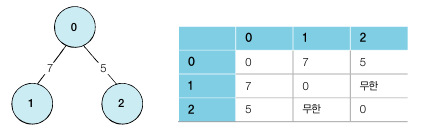

In [ ]:
# 인접 행렬 방식

INF = 999999999 # 무한의 비용 선언

# 2차원 리스트를 이용해 인접 행렬 표현
graph = [
    [0, 7, 5],
    [7, 0, INF],
    [5, INF, 0]
]

print(graph)

[[0, 7, 5], [7, 0, 999999999], [5, 999999999, 0]]


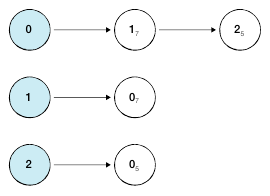

In [ ]:
# 인접 리스트 방식

# 행(Row)이 3개인 2차원 리스트로 인접 리스트 표현
graph = [[] for _ in range(3)]

# 노드 0에 연결된 노드 정보 저장(노드, 거리)
graph[0].append((1, 7))
graph[0].append((2, 5))

# 노드 1에 연결된 노드 정보 저장(노드, 거리)
graph[1].append((0, 7))

# 노드 2에 연결된 노드 정보 저장(노드, 거리)
graph[2].append((0, 5))

print(graph)

[[(1, 7), (2, 5)], [(0, 7)], [(0, 5)]]


* DFS 동작 : 특정한 경로로 탐색하다가 특정 상황에서 최대한 깊숙이 들어가서 노드 방문 후, 다시 돌아가 다른 경로 탐색
 - 1. 탐색 시작 노드를 스택에 삽입하고 방문 처리
 - 2. 스택의 최상단 노드에 방문하지 않은 인접 노드가 있으면 그 인접 노드를 스택에 넣고 방문 처리. 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼냄
 - 3. 2번 과정을 더 이상 수행할 수 없을 때까지 반복
* '방문 처리'는 스택에 한 번 삽입되어 처리된 노드가 다시 삽입되지 않게 체크하는 것

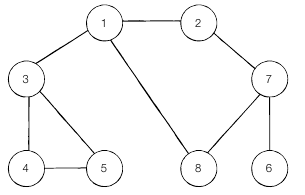

In [ ]:
# DFS 메서드 정의
def dfs(graph, v, visited):
    # 현재 노드를 방문 처리
    visited[v] = True
    print(v, end=' ')
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        if not visited[i]:
            dfs(graph, i, visited)

# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)
graph = [
    [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

# 각 노드가 방문된 정보를 리스트 자료형으로 표현(1차원 리스트)
visited = [False] * 9

# 정의된 DFS 함수 호출
dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

### BFS : Breadth First Search 너비 우선 탐색
* 가까운 노드부터 탐색하는 알고리즘
* BFS 동작
 - 1. 탐색 시작 노드를 큐에 삽입하고 방문 처리
 - 2. 큐에서 노드를 꺼내 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리
 - 3. 2번 과정을 더 이상 수행할 수 없을 때까지 반복

In [ ]:
# BFS 메서드 정의

from collections import deque

def bfs(graph, start, visited):
    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue = deque([start])
    # 현재 노드를 방문 처리
    visited[start] = True
    # 큐가 빌 때까지 반복
    while queue:
        # 큐에서 하나의 원소를 뽑아 출력
        v = queue.popleft()
        print(v, end=' ')
        # 해당 원소와 연결된, 아직 방문하지 않은 원소들을 큐에 삽입
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

# 각 노드가 연결된 정보를 리스트 자료형으로 표현 (2차원 리스트)
graph = [
    [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

# 각 노드가 방문된 정보를 리스트 자료형으로 표현 (1차원 리스트)
visited = [False] * 9

# 정의 된 BFS 함수 호출
bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

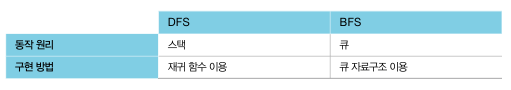

* 2차원 배열에서의 탐색 문제는 그래프 형태로 바꿔서 풀자.

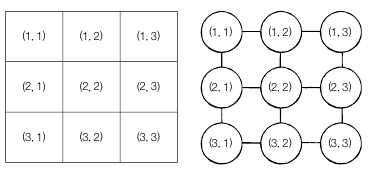

##(3) 음료수 얼려 먹기
* N x M 얼음 틀
* 구멍 뚫린 부분 0, 칸막이 존재 부분 1 표시
* 구멍 뚫린 부분끼리 상, 하, 좌, 우 붙은 경우 연결된 것으로 간주
* 총 아이스크림 갯수 구하는 프로그램 작성
* 입력 조건
 - 첫 번째 줄에 얼음 틀의 세로 길이 N과 가로 길이 M 주어짐 (1 <= N, M <= 1000)
 - 두 번째 줄부터 N+1 줄까지 얼음 틀 형태 주어짐
 - 뚫린 부분 0, 아닌 부분 1
* 출력 조건 : 한번에 만들 수 있는 아이스크림 갯수 출력

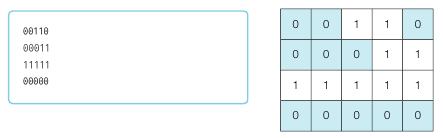

* 1. 특정한 지점의 주변 상, 하, 좌, 우를 살펴본 후, 주변 지점 중에서 값이 0이면서 아직 방문하지 않은 지점 방문
* 2. 방문한 지점에서 다시 상, 하, 좌, 우 살펴보면서 방문 진행 => 연결된 모든 지점 방문
* 3. 1~2과정을 모든 노드에 반복하며 방문하지 않은 지점의 수 셈

In [ ]:
# N, M 입력 받기
n, m = map(int, input().split())

# 2차원 리스트의 맵 정보 입력 받기
graph = []
for i in range(n):
    graph.append(list(map(int, input())))

# DFS로 특정 노드 방문한 뒤에 연결된 모든 노드들도 방문
def dfs(x, y):
    # 주어진 범위를 벗어나는 경우에는 즉시 종료
    if x <= -1 or x >= n or y <= -1 or y >= m:
        return False
    # 현재 노드를 아직 방문하지 않았다면
    if graph[x][y] == 0:
        # 해당 노드 방문 처리
        graph[x][y] = 1
        # 상, 하, 좌, 우 위치도 모두 재귀 호출
        dfs(x-1, y)
        dfs(x, y-1)
        dfs(x+1, y)
        dfs(x, y+1)
        return True
    return False

# 모든 노드(위치)에 대하여 음료수 채우기
result = 0
for i in range(n):
    for j in range(m):
        # 현재 위치에서 DFS 수행
        if dfs(i, j) == True:
            result += 1

print(result) # 정답 출력

3 3
001
010
101
3


##(4) 미로 탈출
* N x M 크기 직사각형 미로를 탈출해야 한다.
* 위치는 (1,1)이고 출구는 (N, M)이다. 한번에 한 칸씩 이동할 수 있다.
* 괴물이 있는 부분은 0, 없는 부분은 1로 표시되어 있다.
* 탈출을 위해 움직여야 하는 최소 칸의 갯수
* 입력 조건
 - 첫째 줄에 두 정수 N, M (4<= N, M <= 200) 주어짐
 - 다음 N개 줄에 각각 M개의 정수 (0혹은 1) 주어짐
* 출력 조건 : 최소 이동 칸의 갯수

In [ ]:
# 입력 에시
# 5 6
# 101010
# 111111
# 000001
# 111111
# 111111
# 출력 예시 : 10

from collections import deque

# N, M 입력 받기
n, m = map(int, input().split())
# 2차원 리스트의 맵 정보 입력 받기
graph = []
for i in range(n):
    graph.append(list(map(int, input())))

# 이동할 네 방향 정의 (상, 하, 좌, 우)
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

# BFS 구현
def bfs(x, y):
    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue = deque()
    queue.append((x, y))
    # 큐 빌 때까지 반복
    while queue:
        x, y = queue.popleft()
        # 현재 위치에서 네 방향으로의 위치 확인
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            # 미로 찾기 공간을 벗어난 경우 무시
            if nx < 0 or ny < 0 or nx >= n or ny >= m:
                continue
            # 벽인 경우 무시
            if graph[nx][ny] == 0:
                continue
            # 해당 노드를 처음 방문하는 경우에만 최단 거리 기록
            if graph[nx][ny] == 1:
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx, ny))

    # 가장 오른쪽 아래까지의 최단 거리 반환
    return graph[n-1][m-1]

# BFS 수행 결과 출력
print(bfs(0,0))

5 6
101010
111111
000001
111111
111111
10


#[04] 정렬
* 연속된 데이터를 기준에 따라서 정렬하기 위한 알고리즘

##(1) 기준에 따라 데이터를 정렬

### 정렬 알고리즘
* 정렬 Sorting : 데이터를 특정한 기준에 따라서 순서대로 나열
* 선택 정렬, 삽입 정렬, 퀵 정렬, 계수 정렬

### 선택 정렬
* 가장 작은 데이터를 선택해 맨 앞에 있는 데이터와 바꾸고, 그다음 작은 데이터를 선택해 앞에서 두 번째 데이터와 바꾸는 과정 반복
* 선택 정렬 Selection Sort 알고리즘 : 매번 '가장 작은 것을 선택'
* 가장 작은 데이터를 앞으로 보내는 과정을 N - 1번 반복하면 정렬 완료

In [ ]:
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

for i in range(len(array)):
    min_index = i # 가장 작은 원소의 인덱스
    for j in range(i + 1, len(array)):
        if array[min_index] > array[j]:
            min_index = j
    array[i], array[min_index] = array[min_index], array[i] # 스와프

print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 삽입 정렬
* 선택 정렬에 비해 실행 시간 측면에서 더 효율적임
* 필요할 때만 위치를 바꾸므로 '데이터가 거의 정렬되어 있을 때' 훨씬 효율적임
* 삽입 정렬 Insertion Sort : 특정한 데이터를 적절한 위치에 '삽입'
* 특정한 데이터가 적절한 위치에 들어가기 이전에, 그 앞까지의 데이터는 이미 정렬되어 있다고 가정
* 정렬되어 있는 데이터 리스트에서 적절한 위치를 찾은 뒤에, 그 위치에 삽입


In [ ]:
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

for i in range(1, len(array)):
    for j in range(i, 0, -1):
        if array[j] < array[j - 1]:
            array[j], array[j - 1] = array[j - 1], array[j]
        else:
            break

print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 퀵 정렬
* '기준 데이터를 설정하고 기 기준보다 큰 데이터와 작은 데이터의 위치를 바꾸면 어떨까?'
* 기준을 설정한 다음 큰 수와 작은 수를 교환한 후 리스트를 반으로 나누는 방식으로 동작
* 큰 숫자와 작은 숫자를 교환하기 위한 '기준' : 피벗 (pivot)
* 피벗을 어떻게 설정할 지 미리 명시해야 함
* 호어 분할 방식 Hoare Partition : 리스트에서 첫 번째 데이터를 피벗으로 정함
* 피벗 설정 후 왼쪽에서부터 피벗보다 큰 데이터 찾고, 오른쪽에서부터 피벗보다 작은 데이터 찾음
* 그 다음 큰 데이터와 작은 데이터의 위치 교환
* 이 과정을 반복하면 '피벗'에 대하여 정렬 수행됨

In [ ]:
array = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array, start, end):
    if start >= end:        # 원소가 1개인 경우 종료
        return
    pivot = start            # 피벗은 첫 번째 원소
    left = start + 1
    right = end
    while left <= right:
        # 피벗보다 큰 데이터를 찾을 때까지 반복
        while left <= end and array[left] <= array[pivot]:
            left += 1
        # 피벗보다 작은 데이터를 찾을 때까지 반복
        while right > start and array[right] >= array[pivot]:
            right -= 1

        if left > right:    # 엇갈렸다면 작은 데이터와 피벗을 교체
            array[right], array[pivot] = array[pivot], array[right]
        else:                # 엇갈리지 않았다면 작은 데이터와 큰 데이터를 교체
            array[left], array[right] = array[right], array[left]

    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행
    quick_sort(array, start, right - 1)
    quick_sort(array, right + 1, end)

quick_sort(array, 0, len(array)-1)
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
array = [5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array):
    # 리스트가 하나 이하의 원소만을 담고 있다면 종료
    if len(array) <= 1:
        return array

    pivot = array[0] # 피벗은 첫 번째 원소
    tail = array[1:] # 피벗을 제외한 리스트

    left_side = [x for x in tail if x <= pivot] # 분할된 왼쪽 부분
    right_side = [x for x in tail if x > pivot] # 분할된 오른쪽 부분

    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬을 수행하고, 전체 리스트 반환
    return quick_sort(left_side) + [pivot] + quick_sort(right_side)

print(quick_sort(array))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 계수 정렬
* 계수 정렬 Count Sort : 특정한 조건이 부합할 때만 사용 가능하지만 매우 빠름
* 데이터의 크기 범위가 제한되어 정수 형태로 표현할 수 있을 때만 가능
* 가장 큰 데이터와 가장 작은 데이터의 차이가 너무 크면 사용할 수 없음
* 모든 범위를 담을 수 있는 크기의 리스트(배열)을 선언해야 하기 때문
* 별도의 리스트를 선언하고 그 안에 정렬에 대한 정보를 담음
* 가장 큰 데이터와 가장 작은 데이터의 범위가 모두 담길 수 있도록 리스트 생성
* 리스트의 모든 데이터를 0으로 초기화
* 데이터 값과 동일한 인덱스의 데이터를 1씩 증가
* 결과적으로 리스트에는 각 데이터가 몇 번 등장했는지 횟수가 기록됨
* 리스트의 첫 번째 데이터부터 그 값만큼 인덱스 출력

In [ ]:
# 모든 원소의 값이 0보다 크거나 같다고 가정
array = [7, 5, 9, 0, 3, 1, 6, 2, 9, 1, 4, 8, 0, 5, 2]

# 모든 범위를 포함하는 리스트 선언 (모든 값 0 초기화)
count = [0] * (max(array) + 1)

for i in range(len(array)):
    count[array[i]] += 1            # 각 데이터에 해당하는 인덱스의 값 증가

for i in range(len(count)):       # 리스트에 기록된 정렬 정보 확인
    for j in range(count[i]):
        print(i, end=' ')                # 띄어쓰기를 구분으로 등장한 횟수만큼 인덱스 출력

0 0 1 1 2 2 3 4 5 5 6 7 8 9 9 

In [ ]:
# 정렬 라이브러리
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

result = sorted(array)
print(result)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
array = [7, 5, 9, 0, 3, 1, 6, 2, 4, 8]

array.sort()
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
array = [('바나나', 2), ('사과', 5), ('당근', 3)]

def setting(data):
    return data[1]

result = sorted(array, key=setting)
print(result)

[('바나나', 2), ('당근', 3), ('사과', 5)]


##(2) 위에서 아래로
* 수열을 내림차순 정렬하는 프로그램
* 입력 조건
 - 첫째 줄에 수열에 속해 있는 수의 갯수 N 주어짐 (1 <= N <= 500)
 - 둘째 줄부터 N+1번째 줄까지 N개 수 입력 (1 이상 100,000 이하 자연수)
* 출력 조건 : 내림차순 정렬 결과를 공백 구분하여 출력

In [ ]:
# 입력 예시
# 3
# 15
# 27
# 12
# 출력 예시 : 27 15 12

# N 입력 받기
n = int(input())

# N 개의 정수를 입력 받아 리스트 저장
array = []
for i in range(n):
    array.append(int(input()))

# 파이썬 기본 정렬 라이브러리를 이용하여 정렬 수행
array = sorted(array, reverse=True)

# 정렬 수행 결과를 출력
for i in array:
    print(i, end=' ')

3
15
27
12
27 15 12 

##(3) 성적이 낮은 순서로 학생 출력하기
* N명의 학생 정보 - 학생 이름과 성적 주어짐
* 성적 낮은 순서대로 이름 출력 프로그램
* 입력 조건
 - 첫 번째 줄 : 학생 수 N 입력 (1 <= N <= 100,000)
 - 두 번째 줄부터 N+1번째 줄 : 이름 문자열 A와 성적 정수 B 공백 구분 입력
* 출력 조건 : 이름을 성적 낮은 순서 출력

In [ ]:
# 입력 예시
# 2
# 홍길동 95
# 이순신 77
# 출력 예시 : 이순신 홍길동

# N 입력 받기
n = int(input())

# N 명 학생 정보 입력 받아 리스트 저장
array = []
for i in range(n):
    input_data = input().split()
    # 이름은 문자열 그대로, 점수는 정수형 변환하여 저장
    array.append((input_data[0], int(input_data[1])))

# 키(Key) 이용하여 점수 기준 정렬
array = sorted(array, key = lambda student : student[1])

# 정렬 수행 결과 출력
for student in array:
    print(student[0], end=' ')

2
홍길동 95
이순신 77
이순신 홍길동 

##(4) 두 배열의 원소 교체
* 두 개의 배열 A와 B. N개의 원소 구성, 원소는 모두 자연수
* 최대 K번 바꿔치기 연산 수행 가능
* 바꿔치기 연산 : 배열 A에 있는 원소와 배열 B 원소 바꿈
* 목표 : 배열 A의 모든 원소 합이 최대가 되는 것
* N, K, A, B 정보 주어졌을 때, 최대 K번의 연산 수행하여 만들 수 있는 배열 A의 원소 합의 최댓값 출력
* 입력 조건
 - 첫 번째 줄 : N, K (1 <= N <= 100,000, 0 <= K <= N)
 - 두 번째 줄 : 배열 A 원소
 - 세 번째 줄 : 배열 B 원소
* 출력 조건 : 최대 K번 바꿔치기 연산 수행하여 만들 수 있는 A 원소 합 최댓값 출력

In [ ]:
# 입력 예시
# 5 3
# 1 2 5 4 3
# 5 5 6 6 5
# 출력 예시 : 26

n, k = map(int, input().split())
a = list(map(int, input().split()))
b = list(map(int, input().split()))

a.sort()
b.sort(reverse=True)

# 첫 번째 인덱스부터 확인하며, 두 배열의 원소를 최대 K번 비교
for i in range(k):
    if a[i] < b[i]:
        a[i], b[i] = b[i], a[i]
    else:
        break

print(sum(a))

5 3
1 2 5 4 3
5 5 6 6 5
26


#[05] 이진 탐색
* 탐색 범위를 반으로 좁혀가며 빠르게 탐색하는 알고리즘

##(1) 범위를 반씩 좁혀가는 탐색

### 순차 탐색
* 순차 탐색 Sequential Search : 리스트 안에 있는 특정한 데이터를 찾기 위해 앞에서부터 데이터를 하나씩 차례대로 확인하는 방법

In [ ]:
# 순차 탐색
def sequential_search(n, target, array):
    # 각 원소를 하나씩 확인하며
    for i in range(n):
        # 현재의 원소가 찾고자 하는 원소와 동일한 경우
        if array[i] == target:
            return i + 1 # 현재의 위치 반환

print('생성할 원소 갯수를 입력한 다음 한 칸 띄고 찾을 문자열을 입력하세요. : ')
input_data = input().split()
n = int(input_data[0])
target = input_data[1]

print('원소 갯수만큼 문자열을 입력하세요. 구분은 띄어쓰기 한 칸 : ')
array = input().split()

# 순차 탐색 수행 결과 출력
print(sequential_search(n, target, array))

생성할 원소 갯수를 입력한 다음 한 칸 띄고 찾을 문자열을 입력하세요. : 
5 Dongbin
원소 갯수만큼 문자열을 입력하세요. 구분은 띄어쓰기 한 칸 : 
Hanul Jonggu Dongbin Taeil Sangwook
3


### 이진 탐색
* 이진 탐색 Binary Search : 배열 내부의 데이터가 정렬되어 있어야만 사용할 수 있는 알고리즘
* 탐색 범위를 절반씩 좁혀가며 데이터 탐색
* 위치를 나타내는 변수 3개 사용 : 탐색 범위의 시작점, 끝점, 중간점
* 찾으려는 데이터와 중간점 위치에 있는 데이터를 반복적으로 비교하여 찾음

In [ ]:
# 재귀 함수로 구현한 이진 탐색
def binary_search(array, target, start, end):
    if start > end:
        return None
    mid = (start + end) // 2
    # 찾은 경우 중간점 인덱스 반환
    if array[mid] == target:
        return mid
    # 중간점의 값보다 찾고자 하는 값이 작은 경우 왼쪽 확인
    elif array[mid] > target:
        return binary_search(array, target, start, mid-1)
    # 중간점의 값보다 찾고자 하는 값이 큰 경우 오른쪽 확인
    else:
        return binary_search(array, target, mid+1, end)

# n(원소의 갯수)과 target(찾고자 하는 문자열) 입력 받기
n, target = list(map(int, input().split()))
# 전체 원소 입력 받기
array = list(map(int, input().split()))

# 이진 탐색 수행 결과 출력
result = binary_search(array, target, 0, n-1)
if result == None:
    print('원소가 존재하지 않습니다.')
else:
    print(result + 1)

10 7
1 3 5 7 9 11 13 15 17 19
4


In [ ]:
# 반복문으로 구현한 이진 탐색
def binary_search(array, target, start, end):
    while start <= end:
        mid = (start + end) // 2
        # 찾은 경우 중간점 인덱스 반환
        if array[mid] == target:
            return mid
        # 중간점의 값보다 찾고자 하는 값이 작은 경우 왼쪽 확인
        elif array[mid] > target:
            end = mid - 1
        # 중간점의 값보다 찾고자 하는 값이 큰 경우 오른쪽 확인
        else:
            start = mid + 1
    return None

# n(원소의 갯수)과 target(찾고자 하는 문자열) 입력 받기
n, target = list(map(int, input().split()))
# 전체 원소 입력 받기
array = list(map(int, input().split()))

# 이진 탐색 수행 결과 출력
result = binary_search(array, target, 0, n-1)
if result == None:
    print('원소가 존재하지 않습니다.')
else:
    print(result + 1)

10 7
1 3 5 7 9 11 13 15 17 19
4


### 트리 자료구조
* 이진 탐색은 전제 조건이 데이터 정렬이다.
* 데이터베이스는 트리 자료구조를 이용하여 데이터가 정렬되어 있다.
* 따라서 데이터베이스에서의 탐색은 이진 탐색과 유사한 방법을 이용해 빠르게 수행하도록 설계되어 있다.
* 트리 자료구조 : 노드와 노드의 연결로 표현. 노드는 정보의 단위로서 어떠한 정보를 가지고 있는 개체.
* 트리 자료구조는 그래프 자료구조의 일종으로 데이터베이스 시스템이나 파일 시스템 등 많은 양의 데이터를 관리하는 목적으로 사용
* 트리 자료구조의 특징
 - 트리는 부모 노드와 자식 노드의 관계로 표현된다.
 - 최상단 노드 : 루트 노드
 - 최하단 노드 : 단말 노드
 - 일부를 떼어내도 트리 구조 : 서브 트리
 - 계층적이고 정렬된 데이터를 다루기에 적합


### 이진 탐색 트리
* 이진 탐색 트리 : 이진 탐색이 동작하도록 고안된, 효율적인 탐색이 가능한 자료구조
* 특징
 - 부모 노드보다 왼쪽 자식 노드가 작다.
 - 부모 노드보다 오른쪽 자식 노드가 크다.

In [ ]:
# sys 라이브러리를 사용하여 한 줄씩 입력 받기
import sys

# 하나의 문자열 데이터 입력 받기
input_data = sys.stdin.readline().rstrip()

# 입력 받은 문자열 출력
print(input_data)

##(2) 부품 찾기
* N개의 부품이 있다. 각 부품은 정수 번호가 있다.
* 손님이 M개 종류의 부품을 주문했다.
* 부품이 모두 있는지 확인하는 프로그램 작성
* 입력 조건
 - 첫째 줄에 정수 N (1 <= N <= 1,000,000)
 - 둘째 줄 : N개 정수 (1 보다 크고 1,000,000 이하)
 - 셋째 줄 : M (1 <= M <= 100,000)
 - 넷째 줄 : M개 정수 (1 보다 크고 1,000,000 이하)
* 출력 조건 : 각 부붐이 존재하면 yes, 없으면 no

In [ ]:
# 입력 예시
# 5
# 8 3 7 9 2
# 3
# 5 7 9
# 출력 예시 : no yes yes

# 이진 탐색 (반복문)
def binary_search(array, target, start, end):
    while start <= end:
        mid = (start + end) // 2

        if array[mid] == target:
            return mid
        elif array[mid] > target:
            end = mid - 1
        else:
            start = mid + 1

    return None

n = int(input())
array = list(map(int, input().split()))
array.sort() # 이진 탐색을 수행하기 위해 정렬 수행

m = int(input())
x = list(map(int, input().split()))

# 손님이 확인 요청한 부품 번호를 하나씩 확인
for i in x:
    result = binary_search(array, i, 0, n-1)
    if result != None:
        print('yes', end=' ')
    else:
        print('no', end=' ')

5
8 3 7 9 2
3
5 7 9
no yes yes 

In [ ]:
# 계수 정렬
# 모든 원소의 번호를 포함할 수 있는 크기의 리스트 만든 후
# 리스트의 인덱스에 접근하여 특정한 번호의 부품이 존재하는지 확인

n = int(input())
array = [0] * 1000001

for i in input().split():
    array[int(i)] = 1

m = int(input())
x = list(map(int, input().split()))

for i in x:
    if array[i] == 1:
        print('yes', end=' ')
    else:
        print('no', end=' ')

5
8 3 7 9 2
3
5 7 9
no yes yes 

In [ ]:
# 집합 자료형 이용

n = int(input())
array = set(map(int, input().split()))

m = int(input())
x = list(map(int, input().split()))

for i in x:
    if i in array:
        print('yes', end=' ')
    else:
        print('no', end=' ')

5
8 3 7 9 2
3
5 7 9
no yes yes 

##(3) 떡볶이 떡 만들기
* 떡의 길이가 일정하지 않다. 높이 H를 지정하여 절단한다.
* 떡을 절단한 후, 잘린 떡을 손님이 가져간다.
* 손님이 요청한 총 길이가 M일 때 절단 높이 최댓값 구하라
* 입력 조건
 - 첫째 줄 : 떡 갯수 N, 요청한 길이 M
 - 둘째 줄 : 개별 떡 높이
* 출력 조건 : 절단기 높이 최댓값

In [ ]:
# 입력 예시
# 4 6
# 19 15 10 17
# 출력 예시 : 15

# 파라메트릭 서치 (Parametric Search) : 최적화 문제를 결정 문제로 바꾸어 해결하는 기법
# '원하는 조건을 만족하는 가장 알맞은 값을 찾는 문제'에 주로 사용
# 예) 범위 내에서 조건을 만족하는 가장 큰 값을 찾으라는 최적화 문제라면 이진 탐색으로 결정 문제를 해결하면서 범위 좁혀감

# 적절한 높이를 찾을 때까지 높이 H를 반복하여 조정
# '현재 이 높이로 자르면 조건 만족할 수 있나?' 확인 후 조건 만족 여부 ('예' 혹은 '아니오') 따라서 탐색 범위 좁혀감
# 이진 탐색 원리 이용하여 절반씩 탐색 범위 좁혀감

n, m = list(map(int, input().split()))
array = list(map(int, input().split()))

# 이진 탐색을 위한 시작점과 끝점 설정
start = 0
end = max(array)

# 이진 탐색 수행(반복)
result = 0
while (start <= end):
    total = 0
    mid = (start + end) // 2

    for x in array:
        # 잘랐을 때 떡의 양 계산
        if x > mid:
            total += x - mid

    # 떡의 양이 부족한 경우 더 많이 자르기 (왼쪽 부분 탐색)
    if total < m:
        end = mid - 1
    # 떡의 양이 충분한 경우 덜 자르기 (오른쪽 부분 탐색)
    else:
        result = mid
        start = mid + 1

print(result)

4 6
19 15 10 17
15


#[06] 다이나믹 프로그래밍
* 한 번 계산한 문제는 다시 계산하지 않도록 하는 알고리즘

##(1) 다이나믹 프로그래밍
* 중복되는 연산을 줄이자
* 연산 속도와 메모리 공간을 최대한 활용할 수 있는 효율적 알고리즘을 작성해야 한다.
* 메모리 공간을 약간 더 사용하면 연산 속도를 비약적으로 증가시킬 수 있는 방법 : 다이나믹 프로그래밍 Dynamic Programming 동적 계획법
* 탑다운, 보텀업
* 메모이제이션 기법

In [ ]:
# 피보나치 함수(Fibonacci Function)를 재귀 함수로 구현
def fibo(x):
    if x == 1 or x == 2:
        return 1
    return fibo(x-1) + fibo(x-2)

print(fibo(4))

# n 커질수록 수행 시간 기하급수적 늘어남
# 동일 함수 반복적으로 호출됨

3


* 다이나믹 프로그래밍 사용 조건
 - (1) 큰 문제를 작은 문제로 나눌 수 있다.
 - (2) 작은 문제에서 구한 정답은 그것을 포함하는 큰 문제에서도 동일하다.

* 메모이제이션 Memoization 기법 : 다이나믹 프로그래밍을 구현하는 방법 중 하나. 한 번 구한 결과를 메모리 공간에 메모해두고 같은 식을 다시 호출하면 결과를 그대로 가져옴 (캐싱 Caching)
* 한 번 구한 정보를 리스트에 저장 (DP 테이블). 다이나믹 프로그래밍을 재귀적으로 수행하다가 같은 정보가 필요할 때는 리스트에서 가져옴

In [ ]:
# 피보나치 수열 (메모이제이션)

# 계산 결과를 메모이제이션(Memoization) 하기 위한 리스트 초기화
d = [0] * 100

# 피보나치 함수를 재귀함수로 구현 (탑다운 프로그래밍)
def fibo(x):
    # 종료 조건 (1 or 2 일 때 1 반환)
    if x == 1 or x == 2:
        return 1
    # 이미 계산한 적 있는 문제라면 그대로 반환
    if d[x] != 0:
        return d[x]
    # 아직 계산하지 않은 문제라면 피보나치 결과 반환
    d[x] = fibo(x-1) + fibo(x-2)
    return d[x]

print(fibo(99))

218922995834555169026


In [ ]:
# 시간 복잡도 O(N)
# 호출되는 함수 확인
d = [0] * 100

def fibo(x):
    print('f(' + str(x) + ')', end=' ')
    if x == 1 or x == 2:
        return 1
    if d[x] != 0:
        return d[x]
    d[x] = fibo(x-1) + fibo(x-2)
    return d[x]

fibo(6)

f(6) f(5) f(4) f(3) f(2) f(1) f(2) f(3) f(4) 

8

* 탑 다운 방식 Top-Down (하향식) : 큰 문제를 해결하기 위해 작은 문제 호출
* 보텀 업 방식 Bottom-Up (상향식) : 반복문을 이용하여 작은 문제부터 차근차근 답을 도출

In [ ]:
# 피보나치 수열 (반복적)

d = [0] * 100

# 첫 번째, 두 번째 피보나치 수 = 1
d[1] = 1
d[2] = 1
n = 99

# 파보나치 함수를 반복적으로 구현 (보텀 업 다이나믹 프로그래밍)
for i in range(3, n+1):
    d[i] = d[i-1] + d[i-2]

print(d[n])

218922995834555169026


##(2) 1로 만들기
* 정수 X에서 사용할 수 있는 연산 4가지
 - X가 5로 나누어 떨어지면, 5로 나눔
 - X가 3으로 나누어 떨어지면, 3으로 나눔
 - X가 2로 나누어 떨어지면, 2로 나눔
 - X에서 1을 뺌
* 1을 만들자. 연산 사용하는 최소 횟수 값 출력
* 입력 조건 : 첫째 줄에 정수 X (1 <= X <= 30,000)
* 출력 조건 : 첫째 줄에 연산 최소 횟수

In [ ]:
# 입력 예시 : 26
# 출력 예시 : 3

x = int(input())

# 앞서 계산한 결과를 저장하기 위한 DP 테이블 초기화
d = [0] * 30001

# Dynimic Programming 진행 (Bottom-Up)
for i in range(2, x+1):
    # 현재 수에서 1 빼는 경우
    d[i] = d[i-1] + 1
    # 현재 수가 2로 나누어 떨어지는 경우
    if i % 2 == 0:
        d[i] = min(d[i], d[i//2] + 1)
    # 현재 수가 3으로 나누어 떨어지는 경우
    if i % 3 == 0:
        d[i] = min(d[i], d[i//3] + 1)
    # 현재 수가 5로 나누어 떨어지는 경우
    if i % 5 == 0:
        d[i] = min(d[i], d[i//5] + 1)

print(d[x])

26
3


##(3) 개미 전사
* 일직선 상 식량창고에서 최대한 많은 식량 얻으려 한다.
* 한 칸 이상 떨어진 식량창고를 약탈해야 한다.
* 식량창고 N개 정보 주어졌을 때 얻을 수 있는 식량 최댓값 구하라
* 입력 조건
 - 첫째 줄 : 식량창고 갯수 N (3 <= N <= 100)
 - 둘째 줄 : 식량 갯수 K (0 <= K <= 1,000)
* 출력 조건 : 식량 최댓값

In [ ]:
# 입력 예시
# 4
# 1 3 1 5
# 출력 예시 : 8

n = int(input())
array = list(map(int, input().split()))

d = [0] * 100

# Dynamic Programming (Bottom-Up)
d[0] = array[0]
d[1] = max(array[0], array[1])
for i in range(2, n):
    d[i] = max(d[i-1], d[i-2] + array[i])

print(d[n-1])

4
1 3 1 5
8


##(4) 바닥 공사
* 가로 N, 세로 2 직사각형 바닥
* 1 x 2, 2 x 1, 2 x 2 덮개로 채우고자 한다.
* 바닥 채우는 모든 경우의 수 구하라
* 입력 조건 : 첫째 줄 N (1 <= N <= 1,000)
* 출력 조건 : 2 x N 바닥 채우는 방법 수를 796,796으로 나눈 나머지 출력

In [ ]:
# 입력 예시 : 3
# 출력 예시 : 5

'''
1. 왼쪽부터 i-1까지 채우면, 2x1 덮개 1개 => 1가지 존재
2. 왼쪽부터 i-2까지 채우면, 1x2 2개 넣는 경우, 2x2 1개 넣는 경우 => 2가지 존재
3. N-2 미만 길이 고려할 필요 없음. 사용 덮개 형태가 최대 2x2 형태임
4. 따라서 점화식 : ai = ai-1 + ai-2 x 2
'''

n = int(input())

d = [0] * 1001

d[1] = 1
d[2] = 3
for i in range(3, n+1):
    d[i] = (d[i-1] + 2 * d[i-2]) % 796796

print(d[n])

3
5


##(5) 효율적인 화폐 구성
* N 종류 화폐
* 화폐 갯수 최소한 이용하여 합이 M원 되도록 하려고 한다.
* 입력 조건
 - 첫째 줄 : N, M (1 <= N <= 100, 1 <= M <= 10,000)
 - N 개 줄 : 각 화폐 가치 (10,000보다 작거나 같은 자연수)
* 출력 조건 : 최소 화폐 갯수 출력 (불가능 시 -1)

In [ ]:
# 입력 예시 1
# 2 15
# 2
# 3
# 출력 예시 1 : 5

# 입력 예시 2
# 3 4
# 3
# 5
# 7
# 출력 예시 2 : -1

# 정수 N, M 입력 받기
n, m = map(int, input().split())

# N개 화폐 단위 정보 입력 받기
array = []
for i in range(n):
    array.append(int(input()))

# 한 번 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [10001] * (m + 1)

# Dynamic Programming 진행 (Bottom-Up)
d[0] = 0
for i in range(n):
    for j in range(array[i], m+1):
        if d[j - array[i]] != 10001:                    # (i - k) 원을 만드는 방법이 존재하는 경우
            d[j] = min(d[j], d[j - array[i]] + 1)

# 결과 출력
if d[m] == 10001:                                       # 최종적으로 M원을 만드는 방법이 없는 경우
    print(-1)
else:
    print(d[m])

2 15
2
3
5


#[07] 최단 경로
* 특정 지점까지 가장 빠르게 도달하는 방법을 찾는 알고리즘

##(1) 가장 빠른 길 찾기

### 가장 빠르게 도달하는 방법
* 최단 경로 Shortest Path 알고리즘 : 가장 짧은 경로를 찾는 알고리즘. '길 찾기' 문제
* 보통 그래프 이용하여 표현. 각 지점은 그래프에서 '노드'로 표현, 지점 간 연결 도로는 '간선'으로 표현
* 다익스트라 최단 경로 알고리즘
* 플로이드 워셜 알고리즘

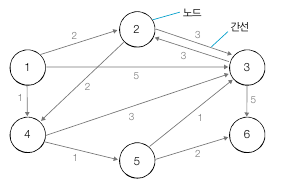

### 다익스트라 최단 경로 알고리즘
* Dijkstra : 그래프에서 여러 개의 노드가 있을 때, 특정한 노드에서 출발하여 다른 노드로 가는 각각의 최단 경로를 구해주는 알고리즘
* 기본적으로 그리디 알고리즘으로 분류됨
* 매번 '가장 비용이 적은 노드'를 선택해서 임의의 과정 반복
* 원리
 - 1. 출발 노드 설정
 - 2. 최단 거리 테이블 초기화
 - 3. 방문하지 않은 노드 중 최단 거리 가장 짧은 노드 선택
 - 4. 해당 노드를 거쳐 다른 노드로 가는 비용을 계산하여 최단 거리 테이블 갱신
 - 5. 위 과정에서 3과 4를 반복
* 최단 경로를 구하는 과정에서 '각 노드에 대한 현재까지의 최단 거리' 정보를 리스트에 저장하며 계속 갱신
* 매번 현재 처리하는 노드를 기준으로 주변 간선을 확인
* 나중에 현재 처리하는 노드와 인접한 노드로 도달하는 더 짧은 경로를 찾으면 '이제부터는 이 경로가 제일 짧은 경로야' 판단
* 따라서 '방문하지 않은 노드 중에서 현재 최단 거리가 가장 짧은 노드를 확인'해 그 노드에 대해 4번 과정 수행한다는 점에서 그리디 알고리즘으로 볼 수 있음
* 한 단계 당 하나의 노드에 대한 최단 거리를 확실히 찾는 것

In [ ]:
# 간단한 다익스트라 알고리즘
# 각 노드에 대한 최단 거리 담는 1차원 리스트 선언
# 단계마다 '방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드를 선택' 하기 위해
# 매 단계마다 1차원 리스트의 모든 원소를 확인(순차 탐색)

import sys
# input = sys.stdin.readline()

INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드 & 간선 갯수 입력 받기
n, m = map(int, input().split())
# 시작 노드 번호를 입력 받기
start = int(input())
# 각 노드에 연결되어 있는 노드 정보를 담는 리스트 만들기
graph = [[ ] for i in range(n + 1)]
# 방문한 적이 있는지 체크하는 리스트 생성
visited = [False] * (n + 1)
# 최단 거리 테이블을 무한으로 초기화
distance = [INF] * (n + 1)

# 모든 간선 정보 입력 받기
for _ in range(m):
    a, b, c = map(int, input().split())
    # a번 노드에서 b번 노드로 가는 비용이 c라는 의미
    graph[a].append([b, c])

# 방문하지 않은 노드 중에서, 가장 최단 거리가 짧은 노드의 번호를 반환
def get_smallest_node():
    min_value = INF
    index = 0
    for i in range(1, n + 1):
        if distance[i] < min_value and not visited[i]:
            min_value = distance[i]
            index = i
    return index

def dijkstra(start):
    # 시작 노드에 대해서 초기화
    distance[start] = 0
    visited[start] = True
    for j in graph[start]:
        distance[j[0]] = j[1]
    # 시작 노드를 제외한 전체 n-1개의 노드에 대해 반복
    for i in range(n-1):
        # 현재 최단 거리가 가장 짧은 노드를 꺼내서 방문 처리
        now = get_smallest_node()
        visited[now] = True
        # 현재 노드와 연결된 다른 노드를 확인
        for j in graph[now]:
            cost = distance[now] + j[1]
            # 현재 노드를 거쳐서 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[j[0]]:
                distance[j[0]] = cost

# 다익스트라 알고리즘 수행
dijkstra(start)

# 모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n+1):
    # 도달할 수 없는 경우, 무한(INFINITY) 출력
    if distance[i] == INF:
        print('INFINITY')
    # 도달할 수 있는 경우 거리 출력
    else:
        print(distance[i])

''' 입력 예시
6 11
1
1 2 2
1 3 5
1 4 1
2 3 3
2 4 2
3 2 3
3 6 5
4 3 3
4 5 1
5 3 1
5 6 2

출력 예시 0 2 3 1 2 4 '''

* 힙 Heap 자료구조 : 우선순위 큐 (Priority Queue)를 구현하기 위해 사용하는 자료구조 중 하나
* 우선순위 큐는 우선순위가 가장 높은 데이터를 가장 먼저 삭제
* 최소 힙 (Min Heap) 혹은 최대 힙 (Max Heap) 사용 : 값이 낮은 데이터 먼저 삭제 / 값이 큰 데이터 먼저 삭제
* 기본적으로 최소 힙 구조 이용, 최대 힙 사용을 위해서는 값에 음수 부호 붙여서 넣었다가, 나중에 꺼낸 다음에 다시 원래 값으로 돌리는 방식
* 우선순위 큐를 이용해서 시작 노드로부터 '거리'가 짧은 노드 순서대로 큐에서 나올 수 있도록 다익스트라 알고리즘 작성
* 현재 가장 가까운 노드를 저장하기 위한 목적으로만 우선순위 큐를 추가로 이용

In [ ]:
# 개선된 다익스트라 알고리즘
import heapq
import sys
# input = sys.stdin.readline
INF = int(1e9)

# 노드 & 간선 갯수 입력 받기
n, m = map(int, input().split())
# 시작 노드 번호 입력 받기
start = int(input())
# 각 노드에 연결되어 있는 노드 정보를 담는 리스트 생성
graph = [[] for i in range(n+1)]
# 최단 거리 테이블을 무한으로 초기화
distance = [INF] * (n+1)

# 간선 정보 입력 받기
for _ in range(m):
    a, b, c = map(int, input().split())
    # a번 노드에서 b번 노드로 가는 비용이 c
    graph[a].append((b,c))

def dijkstra(start):
    q = []
    # 시작 노드로 가기 위한 최단 경로 = 0 설정, 큐에 삽입
    heapq.heappush(q, (0, start))
    distance[start] = 0
    while q:    # 큐가 비어있지 않다면
        # 가장 최단 거리가 짧은 노드에 대한 정보 꺼내기
        dist, now = heapq.heappop(q)
        # 현재 노드가 이미 처리된 적이 있는 노드라면 무시
        if distance[now] < dist:
            continue
        # 현재 노드와 연결된 다른 인접 노드들 확인
        for i in graph[now]:
            cost = dist + i[1]
            # 현재 노드를 거쳐서, 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))

# 다익스트라 알고리즘 수행
dijkstra(start)

# 모든 노드로 가기 위한 최단 거리 출력
for i in range(1, n+1):
    # 도달할 수 없는 경우, 무한(INFINITY) 출력
    if distance[i] == INF:
        print('INFINITY')
    # 도달할 수 있는 경우, 거리 출력
    else:
        print(distance[i])

6 11
1
1 2 2
1 3 5
1 4 1
2 3 3
2 4 2
3 2 3
3 6 5
4 3 3
4 5 1
5 3 1
5 6 2
0
2
3
1
2
4


### 플로이드 워셜 알고리즘
* 다익스트라 알고리즘 : '한 지점에서 다른 특정 지점까지의 최단 경로를 구해야 하는 경우' 사용할 수 있는 최단 경로 알고리즘
* 플로이드 워셜 알고리즘 Floyd-Warshall Algorithm : '모든 지점에서 다른 모든 지점까지의 최단 경로를 모두 구해야 하는 경우'에 사용할 수 있는 알고리즘
* 다익스트라 : 단계마다 최단 거리를 가지는 노드를 하나씩 반복적으로 선택. 그리고 해당 노드를 거쳐 가는 경로를 확인하며, 최단 거리 테이블 갱신
* 플로이드 워셜 : 단계마다 '거쳐 가는 노드' 기준으로 수행. 하지만 매번 방문하지 않은 노드 중에서 최단 거리를 갖는 노드를 찾을 필요는 없음
* 2차원 리스트에 모든 노드에 대하여 다른 모든 노드로 가는 최단 거리 정보를 담음
* 플로이드 워셜 알고리즘은 다이나믹 프로그래밍 : 노드 갯수가 N개일 때, N번 만큼의 단계를 반복하여 '점화식에 맞게' 2차원 리스트를 갱신
* 각 단계에서는 해당 노드를 거쳐 가는 경우를 고려함
* 예) 1번 노드에 대해 확인할 때는 1번 노드를 중간에 거쳐 가는 모든 경우를 고려 (A → 1번 노드 → B 최단 거리 갱신)
* 따라서 알고리즘에서는 현재 확인하는 노드를 제외하고, N-1개의 노드 중에서 서로 다른 노드 (A, B)쌍을 선택. 이후 A → 1번 노드 → B 가는 비용을 확인한 뒤에 최단 거리를 갱신한다.
* 'A에서 B로 가는 최소 비용'과 'A에서 K를 거쳐 B로 가는 비용'을 비교하여 더 작은 값으로 갱신


In [ ]:
# 플로이드 워셜 알고리즘

INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드 & 간선의 갯수 입력 받기
n = int(input())
m = int(input())

# 2차원 리스트(그래프) 생성, 모든 값 = 무한 초기화
graph = [[INF] * (n+1) for _ in range(n+1)]

# 자기 자신에서 자기 자신으로 가는 비용 = 0 초기화
for a in range(1, n+1):
    for b in range(1, n+1):
        if a == b:
            graph[a][b] = 0

# 각 간선에 대한 정보를 입력 받아, 그 값으로 초기화
for _ in range(m):
    # A에서 B로 가는 비용은 C라고 설정
    a, b, c = map(int, input().split())
    graph[a][b] = c

# 점화식에 따라 플로이드 워셜 알고리즘 수행
for k in range(1, n+1):
    for a in range(1, n+1):
        for b in range(1, n+1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

# 수행된 결과 출력
for a in range(1, n+1):
    for b in range(1, n+1):
        # 도달할 수 없는 경우, 무한(INFINITY) 출력
        if graph[a][b] == INF:
            print('INFINITY', end=' ')
        # 도달할 수 있는 경우, 거리 출력
        else:
            print(graph[a][b], end=' ')
    print()

''' 입력 예시
4
7
1 2 4
1 4 6
2 1 3
2 3 7
3 1 5
3 4 4
4 3 2
출력 예시
0 4 8 6
3 0 7 9
5 9 0 4
7 11 2 0 '''

4
7
1 2 4
1 4 6
2 1 3
2 3 7
3 1 5
3 4 4
4 3 2
0 4 8 6 3 0 7 9 5 9 0 4 7 11 2 0 


##(2) 미래 도시
* 1~N번 회사가 있다. 특정 회사끼리는 도로로 연결되어 있다.
* 판매원 A는 현재 1번 회사에 위치해 있으며, X번 회사에 방문하고자 한다.
* 연결된 2개 회사는 양방향 이동 가능
* 소개팅 상대는 K번 회사에 존재
* X번 회사에 물건 판매하기 전 소개팅 회사 방문
* 1번 회사 출발 → K번 회사 방문 → X번 회사 방문
* 이동 최소 시간 계산
* 입력 조건
 - 첫째 줄 : 전체 회사 갯수 N, 경로 갯수 M (1 <= N, M <= 100)
 - 둘째 줄~ M+1번째 줄 : 연결된 두 회사 번호
 - M+2번째 줄 : X, K
* 출력 조건 : K 회사 거쳐 X 회사 가는 최소 이동 시간 (도달할 수 없다면 -1)

In [ ]:
''' 입력 예시 1
5 7
1 2
1 3
1 4
2 4
3 4
3 5
4 5
4 5
출력 예시 1 : 3
입력 예시 2
4 2
1 3
2 4
3 4
출력 예시 2 : -1 '''
# 플로이드 워셜 알고리즘 문제
# 1번 노드~K 거쳐~X로 가는 최단 거리 : 1~K 최단 거리 + K~X 최단거리
INF = int(1e9)

n, m = map(int, input().split())
graph = [[INF] * (n+1) for _ in range(n+1)]

for a in range(1, n+1):
    for b in range(1, n+1):
        if a == b:
            graph[a][b] = 0

# 각 간선 정보 입력 받아, 그 값으로 초기화
for _ in range(m):
    # A와 B가 서로에게 가는 비용 = 1
    a, b = map(int, input().split())
    graph[a][b] = 1
    graph[b][a] = 1

# 거쳐 갈 노드 K와 최종 목적지 노드 X 입력 받기
x, k = map(int, input().split())

# 점화식에 따라 플로이드 워셜 알고리즘 수행
for k in range(1, n+1):
    for a in range(1, n+1):
        for b in range(1, n+1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

# 수행 결과 출력
distance = graph[1][k] + graph[k][x]

# 도달할 수 없는 경우, -1 출력
if distance >= INF:
    print('-1')
else:
    print(distance)

4 2
1 3
2 4
3 4
-1


##(3) 전보
* N개 도시가 있다.
* C에서 보낸 메시지를 받는 도시의 총 갯수, 걸리는 시간 계산
* 입력 조건
 - 첫째 줄 : 도시 갯수 N, 통로 갯수 M, 메시지 보내는 도시 C
 - 둘째 줄~ M+1번째 줄 : 통로 정보 X, Y, Z
* 출력 조건 : 메시지 받는 도시 갯수, 총 소요 시간

In [ ]:
''' 입력 예시
3 2 1
1 2 4
1 3 2
출력 예시 2 4 '''
# 한 도시에서 다른 도시까지 최단 거리 문제 : 다익스트라 알고리즘
import heapq
import sys

# input = sys.stdin.readline
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드 & 간선 갯수, 시작 노드 입력 받기
n, m, start = map(int, input().split())
# 각 노드에 연결되어 있는 노드 정보 담는 리스트 생성
graph = [[] for i in range(n+1)]
# 최단 거리 테이블을 무한으로 초기화
distance = [INF] * (n+1)

# 간선 정보 입력 받기
for _ in range(m):
    x, y, z = map(int, input().split())
    # x번 노드에서 y번 노드로 가는 비용이 z
    graph[x].append((y, z))

def dijkstra(start):
    q = []
    # 시작 노드로 가기 위한 최단 경로 = 0 설정하여, 큐에 삽입
    heapq.heappush(q, (0, start))
    distance[start] = 0
    while q:    # 큐가 비어있지 않다면
        # 가장 최단 거리가 짧은 노드에 대한 정보를 꺼내기
        dist, now = heapq.heappop(q)
        if distance[now] < dist:
            continue
        # 현재 노드와 연결된 다른 인접 노드 확인
        for i in graph[now]:
            cost = dist + i[1]
            # 현재 노드를 거쳐서, 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))

# 다익스트라 알고리즘 수행
dijkstra(start)

# 도달할 수 있는 노드 갯수
count = 0
# 도달할 수 있는 노드 중에서, 가장 멀리 있는 노드와의 최단 거리
max_distance = 0
for d in distance:
    # 도달할 수 있는 노드 경우
    if d != INF:
        count += 1
        max_distance = max(max_distance, d)

# 시작 노드는 제외하므로 count-1 출력
print(count-1, max_distance)

3 2 1
1 2 4
1 3 2
2 4


#[08] 그래프 이론

##(1) 다양한 그래프 알고리즘

### 서로소 집합 Disjoint Sets
* 공통 원소가 없는 두 집합
* 서로소 집합 자료구조 : 서로소 부분 집합들로 나누어진 원소들의 데이터를 처리하기 위한 자료구조
* 서로소 집합 자료구조는 union과 find 2개 연산으로 조작 가능
* union : 2개의 원소가 포함된 집합을 하나의 집합으로 합치는 연산
* find : 특정 원소가 속한 집합이 어떤 집합인지 알려주는 연산
* 서로소 집합 자료구조를 구현할 때는 트리 자료구조를 이용하여 집합을 표현
* 서로소 집합 계산 알고리즘
 - 1. union(합집합) 연산을 확인하여, 서로 연결된 두 노드 A, B 확인 (A와 B의 루트노드 A', B' 를 찾아서 A'를 B'의 부모 노드로 설정 (B'가 A'를 가리키도록 함)
 - 2. 모든 union(합집합) 연산을 처리할 때까지 1번 과정 반복


In [ ]:
''' 입력 예시
6 4
1 4
2 3
2 4
5 6
출력 예시
각 원소가 속한 집합 : 1 1 1 1 5 5
부모 테이블 1 1 2 1 5 5 '''

# 기본적인 서로소 집합 알고리즘

# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적 호출
    if parent[x] != x:
        return find_parent(parent, parent[x])
    return x

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드 갯수와 간선(union 연산) 갯수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화

# 부모 테이블에서, 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i

# union 연산 수행
for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)

# 각 원소가 속한 집합 출력
print('각 원소가 속한 집합 : ', end='')
for i in range(1, v+1):
    print(find_parent(parent, i), end=' ')

print()

# 부모 테이블 내용 출력
print('부모 테이블 : ', end='')
for i in range(i, v+1):
    print(parent[i], end=' ')

6 4
1 4
2 3
2 4
5 6
각 원소가 속한 집합 : 1 1 1 1 5 5 
부모 테이블 : 5 

In [ ]:
# 경로 압축 기법
def find_parent(parent, x):
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

In [ ]:
# 개선된 서로소 집합 알고리즘
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드 갯수 & 간선(union 연산) 갯수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화

# 부모 테이블에서, 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i

# union 연산 수행
for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)

# 각 원소 속한 집합 출력
print('각 원소가 속한 집합 : ', end='')
for i in range(1, v+1):
    print(find_parent(parent, i), end=' ')1

print()

# 부모 테이블 내용 출력
print('부모 테이블 : ', end='')
for i in range(1, v+1):
    print(parent[i], end=' ')

6 4
1 4
2 3
2 4
5 6
각 원소가 속한 집합 : 1 1 1 1 5 5 
부모 테이블 : 1 1 1 1 5 5 

* 서로소 집합을 활용한 사이클 판별
 - 간선을 하나씩 확인하면서 두 노드가 포함되어 있는 집합을 합치는 과정을 반복하는 것으로 사이클 판별
 - 1. 각 간선을 확인하며 두 노드의 루트 노드 확인 (루트 노드 다르면 두 노드 union / 같다면 사이클 발생)
 - 2. 모든 간선에 대하여 1과정 반복

In [ ]:
'''입력 예시
3 3
1 2
1 3
2 3
출력 예시 : 사이클이 발생했습니다. '''

# 서로소 집합을 활용한 사이클 판별

# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if  a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드 개수 & 간선(union 연산) 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v+1) # 부모 테이블 초기화

# 부모 테이블에서, 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i

cycle = False # 사이클 발생 여부

for i in range(e):
    a, b = map(int, input().split())
    # 사이클 발생한 경우 종료
    if find_parent(parent, a) == find_parent(parent, b):
        cycle = True
        break
    # 사이클 발생하지 않았다면 합집합(union) 수행
    else:
        union_parent(parent, a, b)
if cycle:
    print('사이클이 발생했습니다.')
else:
    print('사이클이 발생하지 않았습니다.')

3 3
1 2
1 3
2 3
사이클이 발생했습니다.


### 신장 트리
* 신장 트리 Spanning Tree : 하나의 그래프가 있을 때 모든 노드를 포함하면서 사이클이 존재하지 않는 부분 그래프
* 최소 신장 트리 알고리즘 : 신장 트리 중 최소 비용으로 만들 수 있는 신장 트리를 찾는 알고리즘
* 크루스칼 알고리즘 : Kruskal Algorithm 가장 적은 비용으로 모든 노드 연결. 그리디 알고리즘. 모든 간선에 대하여 정렬 수행 후, 가장 거리 짧은 간선부터 집합에 포함 시킴. 사이클 발생시키는 간선은 제외.
 - 1. 간선 데이터를 비용에 따라 오름차순 정렬
 - 2. 간선을 하나씩 확인하며 사이클 발생시키는지 확인 (발생 X 경우 최소 신장 트리에 포함, 발생 O 경우 제외)
 - 3. 모든 간선에 대해 2번 과정 반복

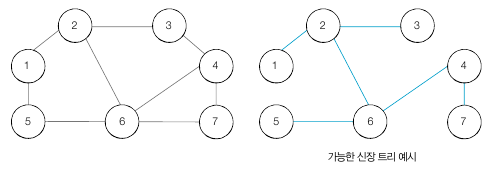

* 예) N개 도시에서 두 도시 사이에 도로를 놓아 전체 도시 연결될 수 있도록 하자. 최소한의 비용으로 연결하려면 어떤 알고리즘을 이용해야 할까?

In [ ]:
''' 입력 예시
7 9
1 2 29
1 5 75
2 3 35
2 6 34
3 4 7
4 6 23
4 7 13
5 6 53
6 7 25
출력 예시 : 159 '''

# 크루스칼 알고리즘

# 특정 원소가 속한 집합 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드 갯수 & 간선(union 연산) 갯수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v+1) # 부모 테이블 초기화

# 모든 간선을 담을 리스트와 최종 비용을 담을 변수
edges = []
result = 0

# 부모 테이블에서 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i

# 모든 간선에 대한 정보를 입력 받기
for _ in range(e):
    a, b, cost = map(int, input().split())
    # 비용 순으로 정렬하기 위하여 튜플의 첫 번째 원소를 비용으로 설정
    edges.append((cost, a, b))

# 간선을 비용 순으로 정렬
edges.sort()

# 간선을 하나씩 확인하며
for edge in edges:
    cost, a, b = edge
    # 사이클이 발생하지 않는 경우에만 집합에 포함
    if find_parent(parent, a) != find_parent(parent, b):
        union_parent(parent, a, b)
        result += cost

print(result)

7 9
1 2 29
1 5 75
2 3 35
2 6 34
3 4 7
4 6 23
4 7 13
5 6 53
6 7 25
159


### 위상 정렬
* Topology Sort : 순서가 정해져 있는 일련의 작업을 차례로 수행해야 할 때 사용
* 방향 그래프의 모든 노드를 '방향성에 거스르지 않도록 순서대로 나열'
* 예) 선수과목을 고려한 학습 순서 설정
* 진입차수 Indegree : 특정한 노드로 '들어오는' 간선의 갯수
* 알고리즘
 - 1. 진입차수가 0인 노드를 큐에 넣음
 - 2. 큐가 빌 때까지 다음 과정을 반복 : (1) 큐에서 원소를 꺼내 해당 노드에서 출발하는 간선을 그래프에서 제거. (2) 새롭게 진입차수가 0이 된 노드를 큐에 넣음

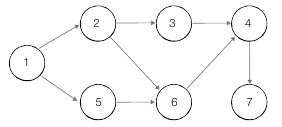

In [ ]:
''' 입력 예시
7 8
1 2
1 5
2 3
2 6
3 4
4 7
5 6
6 4
출력 예시 : 1 2 5 3 6 4 7'''

from collections import deque

# 노드 & 간선 갯수 입력 받기
v, e = map(int, input().split())
# 모든 노드에 대한 진입 차수 0 초기화
indegree = [0] * (v+1)
# 각 노드에 연결된 간선 정보를 담기 위한 연결 리스트(그래프) 초기화
graph = [[] for i in range(v+1)]

# 방향 그래프의 모든 간선 정보 입력 받기
for _ in range(e):
    a, b = map(int, input().split())
    graph[a].append(b) # 정점 A에서 B로 이동 가능
    # 진입 차수를 1 증가
    indegree[b] += 1

# 위상 정렬 함수
def topology_sort():
    result = [] # 알고리즘 수행 결과를 담을 리스트
    q = deque() # 큐 기능을 위한 deque 라이브러리 사용

    # 처음 시작할 때는 진입차수=0 노드를 큐에 삽입
    for i in range(1, v+1):
        if indegree[i] == 0:
            q.append(i)

    # 큐가 빌 때까지 반복
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        result.append(now)
        # 해당 원소와 연결된 노드들의 진입차수에서 1 빼기
        for i in graph[now]:
            indegree[i] -= 1
            # 새롭게 진입차수가 0이 되는 노드를 큐에 삽입
            if indegree[i] == 0:
                q.append(i)

    # 위상 정렬 수행 결과 출력
    for i in result:
        print(i, end=' ')

topology_sort()

7 8
1 2
1 5
2 3
2 6
3 4
4 7
5 6
6 4
1 2 5 3 6 4 7 

##(2) 팀 결성
* 0~N번 학생이 서로 다른 팀으로 구분되어 N+1개 팀 존재
* '팀 합치기' 연산, '같은 팀 여부 확인' 연산 사용 가능
* 1. 팀 합치기 : 두 팀 합치는 연산
* 2. 같은 팀 여부 확인 : 특정한 두 학생이 같은 팀 속하는지 확인하는 연산
* M개 연산 수행할 수 있을 때, '같은 팀 여부 확인' 연산에 대한 연산 결과 출력
* 입력 조건
 - 첫째 줄 : N, M 주어짐
 - 다음 M개 줄 : 각각의 연산
 - '팀 합치기' 연산 : 0 a b 형태 (a와 b 속한 팀 합침)
 - '같은 팀 여부 확인' 연산 : 1 a b 형태 (a와 b 같은 팀 속했는지 확인)
* 출력 조건 : '같은 팀 여부 확인' 연산에 대하여 YES 혹은 NO로 결과 출력


In [ ]:
''' 입력 예시
7 8
0 1 3
1 1 7
0 7 6
1 7 1
0 3 7
0 4 2
0 1 1
1 1 1
출력 예시 NO NO YES '''

# 서로소 집합 알고리즘 with 경로 압축 방식

# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# N, M 입력 받기
n, m = map(int, input().split())
parent = [0] * (n + 1) # 부모 테이블 초기화

# 부모 테이블에서 부모를 자기 자신으로 초기화
for i in range(0, n+1):
    parent[i] = i

# 각 연산을 하나씩 확인
for i in range(m):
    oper, a, b = map(int, input().split())
    # 합집합(union) 연산인 경우
    if oper == 0:
        union_parent(parent, a, b)
    # 찾기(find) 연산인 경우
    elif oper == 1:
        if find_parent(parent, a) == find_parent(parent, b):
            print('YES')
        else:
            print('NO')

7 8
0 1 3
1 1 7
NO
0 7 6
1 7 1
NO
0 3 7
0 4 2
0 1 1
1 1 1
YES


## (3) 도시 분할 계획
* N개의 집과 M개의 길
* 2개 마을 분할
* 마을에는 집이 하나 이상, 각 분리된 마을 안의 집들은 서로 연결
* 길의 유지비 합의 최솟값
* 입력 조건
 - 첫째 줄 : 집 갯수 N, 길 갯수 M
 - M개 줄에 걸쳐 : 길 정보 A, B, C (A, B 집 연결 길 유지비 C)
* 출력 조건 : 유지비 합 최솟값

In [ ]:
''' 입력 예시
7 12
1 2 3
1 3 2
3 2 1
2 5 2
3 4 4
7 3 6
5 1 5
1 6 2
6 4 1
6 5 3
4 5 3
6 7 4
출력 예시 : 8 '''

# 전체 그래프에서 2개의 최소 신장 트리 만들어야 한다.
# 최소 비용으로 2개의 신장 트리로 분할
# 크루스칼 알고리즘으로 최소 신장 트리 찾은 후, 최소 신장 트리 구성 간선 중 가장 비용 큰 간선 제거

# 특정 원소가 속한 집합 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드 & 간선(union 연산) 갯수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v+1) # 부모 테이블 초기화

# 모든 간선을 담을 리스트와 최종 비용 담을 변수
edges = []
result = 0

# 부모 테이블 상에서 부모를 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i

# 간선 정보 입력 받기
for _ in range(e):
    a, b, cost = map(int, input().split())
    # 비용 순 정렬 위해 튜플의 첫 번째 원소를 비용으로 설정
    edges.append((cost, a, b))

# 간선을 비용 순 정렬
edges.sort()
last = 0 # 최소 신장 트리에 포함되는 간선 중에서 가장 비용이 큰 간선

# 간선을 하나씩 확인하며
for edge in edges:
    cost, a, b = edge
    # 사이클이 발생하지 않는 경우에만 집합에 포함
    if find_parent(parent, a) != find_parent(parent, b):
        union_parent(parent, a, b)
        result += cost
        last = cost

print(result - last)

7 12
1 2 3
1 3 2
3 2 1
2 5 2
3 4 4
7 3 6
5 1 5
1 6 2
6 4 1
6 5 3
4 5 3
6 7 4
8


## (4) 커리큘럼
* 총 N개 강의 듣고자 한다. 모든 강의는 1~N번 번호 가진다.
*동시에 여러 개의 강의 들을 수 있다.
* 선수 강의가 있는 강의는 선수 강의를 들어야만 해당 강의를 들을 수 있다.
* N개 수강하기 까지 걸리는 최소 시간 출력
* 입력 조건
 - 첫째 줄 : 강의 수 N
 - 다음 N개 줄 : 각 강의 시간, 선수 강의 번호, 각 줄은 -1로 끝남
* 출력 조건 : N개 강의 수강하기까지 걸리는 최소 시간을 한 줄에 하나씩 출력

In [ ]:
''' 입력 예시
5
10 -1
10 1 -1
4 1 -1
4 3 1 -1
3 3 -1
출력 예시
10 20 14 18 17 '''
# 위상 정령 알고리즘
# 각 노드(강의)에 대하여 인접한 노드를 확인할 때, 인접한 노드에 대하여 현재보다 강의시간이 더 긴 경우를 찾는다면,
# 더 오랜 시간이 걸리는 경우의 시간 값을 저장하는 방식으로 결과 테이블 갱신
from collections import deque
import copy

# 노드 갯수 입력 받기
v = int(input())
# 모든 노드에 대한 진입차수 0 초기화
indegree = [0] * (v+1)
# 각 노드에 연결된 간선 정보 담는 연결 리스트(그래프) 초기화
graph = [[] for i in range(v+1)]
# 각 강의 시간 0 초기화
time = [0] * (v+1)

# 방향 그래프의 모든 간선 정보 입력 받기
for i in range(1, v+1):
    data = list(map(int, input().split()))
    time[i] = data[0] # 첫 번째 수는 시간 정보를 담고 있음
    for x in data[1:-1]:
        indegree[i] += 1
        graph[x].append(i)

# 위상 정렬 함수
def topology_sort():
    result = copy.deepcopy(time) # 알고리즘 수행 결과를 담을 리스트
    q = deque() # 큐 기능을 위한 deque 라이브러리 사용

    # 처음 시작할 때는 진입차수 = 0 노드를 큐에 삽입
    for i in range(1, v+1):
        if indegree[i] == 0:
            q.append(i)

    # 큐가 빌 때까지 반복
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        #해당 원소와 연결된 노드들의 진입차수에서 1 빼기
        for i in graph[now]:
            result[i] = max(result[i], result[now] + time[i])
            indegree[i] -= 1
            # 새롭게 진입차수가 0이 되는 노드를 큐에 삽입
            if indegree[i] == 0:
                q.append(i)

    # 위상 정렬 수행 결과 출력
    for i in range(1, v+1):
        print(result[i])

topology_sort()

5
10 -1
10 1 -1
4 1 -1
4 3 1 -1
3 3 -1
10
20
14
18
17


#[09] 참고

##(1) itertools
* itertools : 반복되는 데이터를 처리하는 기능을 포함하는 라이브러리
* permutations : 리스트와 같은 iterable 객체에서 r개 데이터를 뽑아 일렬로 나열하는 모든 경우 (순열) 계산. 클래스이므로 객체 초기화 이후에는 리스트 자료형으로 변환하여 사용
* combinations : 리스트와 같은 iterable 객체에서 r개 데이터를 뽑아 순서 고려하지 않고 나열하는 모든 경우(조합) 계산.

In [ ]:
# permutations
# 리스트 ['A', 'B', 'C]에서 3개(r=3)를 뽑아 나열하는 모든 경우 출력
from itertools import permutations

data = list('ABC')
result = list(permutations(data, 3))

print(result)

[('A', 'B', 'C'), ('A', 'C', 'B'), ('B', 'A', 'C'), ('B', 'C', 'A'), ('C', 'A', 'B'), ('C', 'B', 'A')]


In [ ]:
# combinations
# 리스트 ['A', 'B', 'C']에서 3개(r=2)를 뽑아 순서 상관없이 나열하는 모든 경우 출력
from itertools import combinations

data = list('ABC')
result = list(combinations(data, 2))

print(result)

[('A', 'B'), ('A', 'C'), ('B', 'C')]


In [ ]:
# product : permutations와 같이 리스트와 같은 iterable 객체에서 r개 데이터를 뽑아 일렬로 나열하는
# 모든 경우 (순열) 계산
# 다만, 원소를 중복하여 추출
from itertools import product

data = list('ABC')
result = list(product(data, repeat=2))  # 2개 뽑는 모든 순열 구하기 (중복 허용)

print(result)

[('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'C')]


In [ ]:
# combinations_with_replacement
# combinations와 같이 리스트와 같은 iterable 객체에서 r개의 데이터를 뽑아 순서를 고려하지 않고
# 나열하는 모든 경우(조합) 계산
# 다만, 원소를 중복하여 추출
from itertools import combinations_with_replacement

data = list('ABC')
result = list(combinations_with_replacement(data, 2))

print(result)

[('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'B'), ('B', 'C'), ('C', 'C')]


##(2) heapq
* heapq 라이브러리 : 우선순위 큐 기능 구현
* 힙에 원소 삽입 시 : heapq.heappush() 메서드 사용
* 힙에서 원소를 꺼낼 때 : heapq.heappop() 메서드 사용

In [ ]:
# 힙 정렬을 heapq로 구현
import heapq

def heapsort(iterable):
    h = []
    result = []
    # 모든 원소를 차례대로 힙에 삽입
    for value in iterable:
        heapq.heappush(h, value)
    # 힙에 삽입된 모든 원소를 차례대로 꺼내어 담기
    for i in range(len(h)):
        result.append(heapq.heappop(h))
    return result

result = heapsort([1,3,5,7,9,2,4,6,8,0])
print(result)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# 최대 힙 구현 : 원소의 부호를 임시로 변경
import heapq

def heapsort(iterable):
    h = []
    result = []
    # 모든 원소를 차례대로 힙에 삽입
    for value in iterable:
        heapq.heappush(h, -value)
    # 힙에 삽입된 모든 원소를 차례대로 꺼내어 담기
    for i in range(len(h)):
        result.append(-heapq.heappop(h))
    return result

result = heapsort([1,3,5,7,9,2,4,6,8,0])
print(result)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


##(3) bisect
* bisect 라이브러리 : 이진 탐색 구현
* '정렬된 배열'에서 특정 원소 찾아야 할 때 효과적
* bisect_left(a, x) : 정렬된 순서를 유지하면서 리스트 a에 데이터 x를 삽입할 가장 왼쪽 인덱스 찾는 메서드
* bisect_right(a, x) : 정렬된 순서를 유지하도록 리스트 a에 데이터 x를 삽입할 가장 오른쪽 인덱스 찾는 메서드

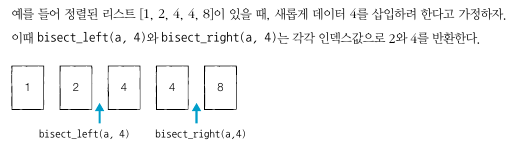

In [ ]:
from bisect import bisect_left, bisect_right

a = [1,2,4,4,8]
x = 4

print(bisect_left(a, x))
print(bisect_right(a, x))

2
4


In [ ]:
# '정렬된 리스트'에서 '값이 특정 범위에 속하는 원소의 갯수' 구하기
from bisect import bisect_left, bisect_right

# 값이 [left_value, right_value]인 데이터의 갯수를 반환하는 함수
def count_by_range(a, left_value, right_value):
    right_index = bisect_right(a, right_value)
    left_index = bisect_left(a, left_value)
    return right_index - left_index

# 리스트 선언
a = [1,2,3,3,3,3,4,4,8,9]

# 값이 4인 데이터 갯수 출력
print(count_by_range(a, 4, 4))

# 값이 [-1, 3] 범위에 있는 데이터 갯수 출력
print(count_by_range(a, -1, 3))

2
6


## (4) collections
* collections 라이브러리 : deque, Counter 클래스 유용하게 사용
* deque : 큐 구현. 나열된 데이터의 시작 부분이나 끝 부분에 데이터를 삽입/삭제 효과적. 스택과 큐의 기능 모두 포함
* popleft() : 첫 번째 원소 제거
* pop() : 마지막 원소 제거
* appendleft(x) : 첫 번째 인덱스에 원소 x 삽입
* append(x) : 마지막 인덱스에 원소 삽입
* 따라서 deque를 큐 자료구조로 이용할 때, 원소를 삽입할 때는 append() 사용, 삭제할 때는 popleft() 사용하면 선입선출

In [ ]:
from collections import deque

data = deque([2,3,4])
data.appendleft(1)
data.append(5)

print(data)
print(list(data))

deque([1, 2, 3, 4, 5])
[1, 2, 3, 4, 5]


* Counter : 등장 횟수 세는 기능. iterable 객체가 주어졌을 때, 객체 내부의 원소가 몇 번씩 등장했는지 알려줌

In [ ]:
from collections import Counter

counter = Counter(['red', 'blue', 'red', 'green', 'blue', 'blue'])

print(counter['blue'])
print(counter['green'])
print(dict(counter))

3
1
{'red': 2, 'blue': 3, 'green': 1}


#[10] 기타 알고리즘

##(1) 소수의 판별

##(2) 에라토스테네스의 체

##(3) 투 포인터

##(4) 구간 합 계산

##(5) 순열과 조합

##(6) 소수 구하기

##(7) 암호 만들기